In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [5]:
X = iris.iloc[:,:4 ]

In [6]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y = iris.iloc[:,-1]

In [8]:
#y.astype('category').cat.codes

In [9]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1 )

In [11]:
knn = KNeighborsClassifier()

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
predictions = knn.predict(X_test)

In [14]:
predictions

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor'], dtype=object)

In [15]:
pd.DataFrame({'actual':y_test, 'predictions':predictions})

,actual,predictions
14,setosa,setosa
98,versicolor,versicolor
75,versicolor,versicolor
16,setosa,setosa
131,virginica,virginica
56,versicolor,versicolor
141,virginica,virginica
44,setosa,setosa
29,setosa,setosa
120,virginica,virginica


In [16]:
# Evaluation
(predictions==y_test).sum()/len(y_test)*100

98.33333333333333

In [17]:
knn.score(X_test, y_test)

0.9833333333333333

# Evaluation

In [19]:
features_name = 'sepal_length sepal_width'.split()
X = iris[features_name]
y = iris['species'].astype('category').cat.codes
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
knn.score(X_test, y_test)

0.8

In [20]:
from sklearn.metrics import confusion_matrix

In [26]:
#cf_mat = confusion_matrix(y_test, predictions)
cf_mat = confusion_matrix(y_test, predictions, labels = [1,2])
cf_mat / y_test.value_counts().iloc[1:].values.reshape((2,1))

array([[0.4       , 0.46666667],
       [0.15384615, 1.        ]])

In [24]:
cf_mat

array([[ 6,  7],
       [ 2, 13]], dtype=int64)

Text(33.0, 0.5, 'Actual')

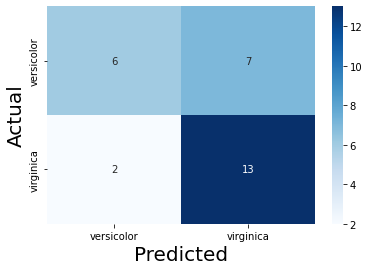

In [31]:
# Heat Map
%matplotlib inline
f,ax = plt.subplots()
labels = iris.species.unique()[1:]

sns.heatmap(cf_mat, cmap = 'Blues', annot = True, xticklabels = labels, yticklabels=labels);

plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions, target_names = iris.species.unique()))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.75      0.46      0.57        13
   virginica       0.65      0.87      0.74        15

    accuracy                           0.80        45
   macro avg       0.80      0.78      0.77        45
weighted avg       0.81      0.80      0.79        45



# Classification Playground

In [40]:
from classification_plotter import setup, plot_pred_actual

ModuleNotFoundError: No module named 'classification_plotter'